In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_csv('train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S


* df.head() = first 5 rows
* df.tail() = last 5 rows
* df.describe() = provides common stats on all number columns.
* df.describe(include='all') = adds data on text fields.
* _ = plt.hist(ages, bins = range(0,100,10)) = creates a histogram with assigned bin(from  0 to 100, each at 10 difference)
* df.Pclass.value_counts() = gives count of data

In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hart, Mr. Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


we can see that some values are missing, like cabin number(cabin). 

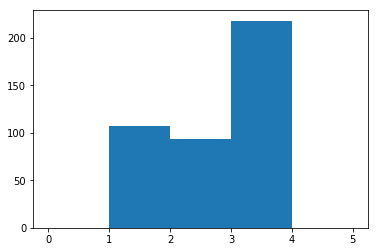

In [8]:
_ = plt.hist(df.Pclass, bins = range(0,6,1))

In [5]:
ages = df.Age.dropna()

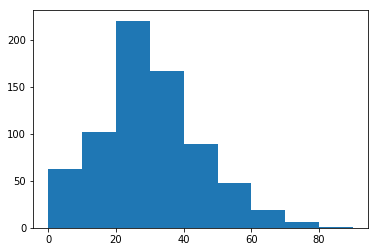

In [6]:
_ = plt.hist(ages, bins = range(0,100,10))

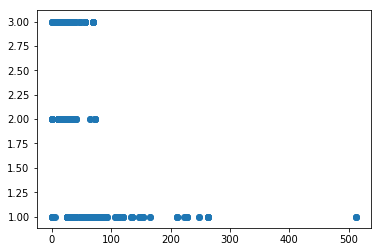

In [7]:
faresNA = df.Fare.fillna(df.Fare.mean())
_ = plt.scatter(faresNA, df.Pclass)

from this, we can see that upper class had a larger difference in the amount they payed for their ticket, whereas 2nd and 3rd class payed relatively similiar amounts for their tickets, and always less than $100 for their ticket. Next thing is to add survival rates to see how that affects the data. I predict a positive correlation between fare price and survival.

In [8]:
pclass_xt = pd.crosstab(df.Pclass, df.Survived)
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [9]:
age_corr = pd.DataFrame(df, columns=['Survived', 'Age']).dropna()
sex_age = pd.DataFrame(df, columns=['Sex', 'Age']).dropna()
age_corr.describe()

,Survived,Age
count,714.000000,714.000000
mean,0.406162,29.699118
std,0.491460,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


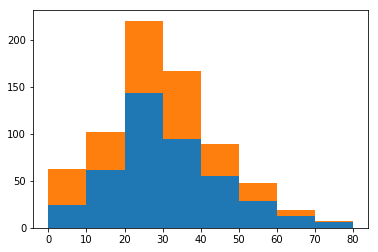

In [10]:
ageS1 = age_corr[age_corr.Survived ==1]['Age']
ageS0 = age_corr[age_corr.Survived ==0]['Age']


max_age =max(age_corr.Age)

#_=plt.hist([ageS0, ageS1], stacked = False)

_=plt.hist([ageS0, ageS1], bins = int(max_age/10), range = (0,max_age), stacked = True)

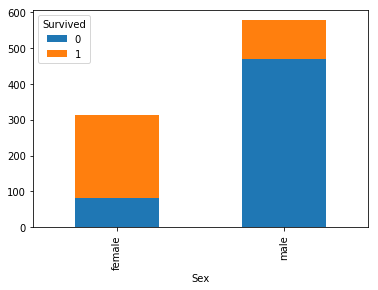

In [11]:
sex_xt = pd.crosstab(df.Sex, df.Survived)
sex_xt.plot(kind='bar',
             stacked = True)

In [12]:
sex_xt

Survived,0,1
Sex,,
female,81,233
male,468,109


C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


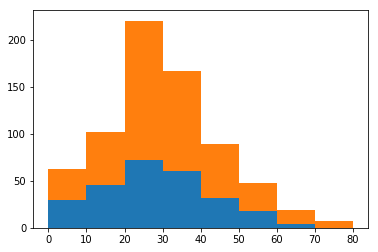

In [13]:
ageS1 = sex_age[sex_age.Sex =='male']['Age']
ageS0 = sex_age[sex_age.Sex =='female']['Age']


max_age =max(age_corr.Age)

#_=plt.hist([ageS0, ageS1], stacked = False)

_=plt.hist([ageS0, ageS1], bins = int(max_age/10), range = (0,max_age), stacked = True)

we now know that sex, age, and class are all related directly to survival. Females have an incredibly high survival chance of around 70%! Younger children had around a 50% chance of surviving.